# **Project: Anomaly Detection for AITEX Dataset**
#### Track: VAE
## `Notebook 2`: Understanding Autoencoders
**Author**: Oliver Grau 

**Date**: 27.03.2025  
**Version**: 1.0


## 📚 Table of Contents

- [1. What is an Autoencoder](#1-what-is-an-autoencoder)
- [2. Why are Autoencoders Useful for Anomaly Detection](#2-why-are-autoencoders-useful-for-anomaly-detection)
- [3. A Simple Visual Example](#3-a-simple-visual-example)
- [4. Conclusion & Outlook](#4-conclusion-and-outlook)

---

## 1. What is an Autoencoder?

An autoencoder is a type of neural network that learns to compress data into a lower-dimensional form (encoding) and then reconstruct it (decoding) as closely as possible to the original. The main goal is to learn an efficient internal representation of the input data.

Think of it as a smart copier: it tries to reproduce the input, but it’s forced to do so by first squeezing the information through a **bottleneck**. This bottleneck captures the most **essential features** of the data.

![Autoencoder Structure](https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png?20151210181113)

*Image Source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Autoencoder_structure.png)*


### Key Components
- **Encoder**: Transforms the input data into a compressed representation.
- **Bottleneck**: The compressed, latent representation of the data (the network’s learned internal understanding).
- **Decoder**: Attempts to reconstruct the original input from the bottleneck representation.

---


<details>
<summary><strong>Advanced: Understanding the Bottleneck in Autoencoders</strong></summary>

### The Bottleneck in Autoencoders

In an autoencoder, the **bottleneck** refers to the central layer with a reduced number of neurons compared to the input and output layers. This intentional reduction forces the model to learn a compressed representation of the input data, capturing its most salient features while discarding noise or redundant information.

**Why This Works:**

- **Feature Extraction:** By compressing the data, the autoencoder identifies and retains only the most critical features necessary for accurate reconstruction.

- **Noise Reduction:** The bottleneck helps eliminate insignificant details, allowing the model to focus on the underlying patterns in the data.

- **Dimensionality Reduction:** It reduces the complexity of the data, making it easier to analyze and visualize.

### Bottleneck's Role in Anomaly Detection

The bottleneck's constrained capacity means the autoencoder becomes adept at reconstructing data similar to what it has seen during training (i.e., normal data). When presented with anomalous data that deviates from the norm, the autoencoder struggles to reconstruct it accurately, leading to a higher reconstruction error. This discrepancy between the input and its reconstruction serves as a signal for detecting anomalies.

In the diagram above:

- **Input Layer:** Receives the original data.

- **Encoder:** Compresses the input into a latent-space representation.

- **Bottleneck:** Holds the compressed, essential features of the input data.

- **Decoder:** Reconstructs the input data from the bottleneck representation.

- **Output Layer:** Outputs the reconstructed data.

This structure ensures that only the most relevant features of the data are retained, making it effective for anomaly detection tasks.

Understanding the role of the bottleneck provides valuable insights into designing autoencoders for specific applications, including anomaly detection.

---
</details>




## 2. Why Are Autoencoders Useful for Anomaly Detection?
Autoencoders are trained on "normal" data, learning its structure very well. When they encounter something unusual (an anomaly), they usually struggle to reconstruct it accurately. This results in a high reconstruction error and this is an important signal for detecting anomalies.

This approach works particularly well for time-series or sensor data, which is common in many SME environments (e.g., machinery metrics, traffic logs, transaction streams).

## 3. A Simple Visual Example
Let's have a look at a simple example! Instead of using complex tabular data we take a simple sine wave as a representative for data that should be checked for anomalies.

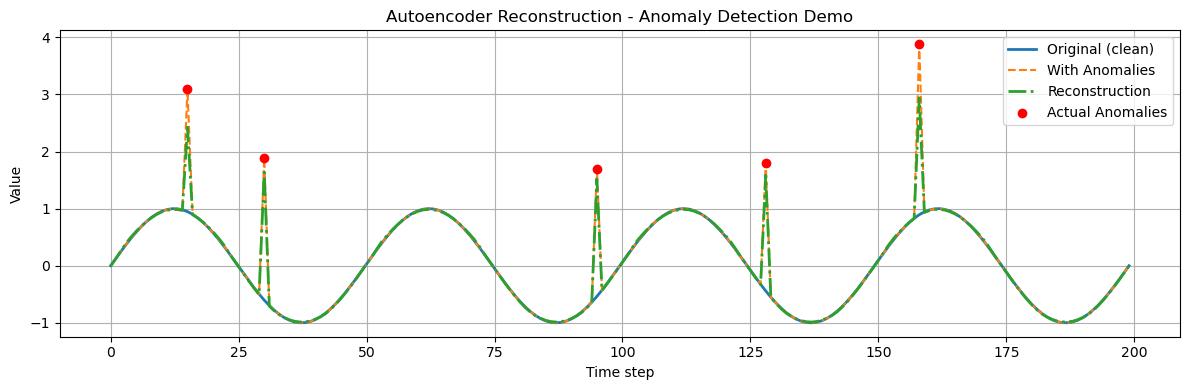

In [1]:
# Compact PyTorch Autoencoder Demo for Sine Wave Anomaly Detection
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Set random seeds
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic sine wave data
def generate_sine_wave(length=200, anomalies=5):
    x = np.linspace(0, 8 * np.pi, length)
    sine_wave = np.sin(x)
    anomalous_wave = sine_wave.copy()
    anomaly_indices = np.random.choice(length, anomalies, replace=False)
    anomalous_wave[anomaly_indices] += np.random.uniform(2, 3, anomalies)
    return sine_wave, anomalous_wave, anomaly_indices

# Prepare data
original, anomalous, anomaly_idx = generate_sine_wave()
train_data = torch.tensor(original, dtype=torch.float32).unsqueeze(1)

# Define a simple Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(nn.Linear(1, 8), nn.ReLU(), nn.Linear(8, 2))
        self.decoder = nn.Sequential(nn.Linear(2, 8), nn.ReLU(), nn.Linear(8, 1))

    def forward(self, x):
        x = self.encoder(x)
        return self.decoder(x)

# Instantiate model, loss, optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the autoencoder (briefly)
epochs = 200
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(train_data)
    loss = criterion(output, train_data)
    loss.backward()
    optimizer.step()

# Reconstruction on anomalous data
with torch.no_grad():
    test_data = torch.tensor(anomalous, dtype=torch.float32).unsqueeze(1)
    reconstructed = model(test_data).squeeze().numpy()

# Plot original vs reconstructed data
plt.figure(figsize=(12, 4))
plt.plot(original, label='Original (clean)', linewidth=2)
plt.plot(anomalous, label='With Anomalies', linestyle='--')
plt.plot(reconstructed, label='Reconstruction', linestyle='-.', linewidth=2)
plt.scatter(anomaly_idx, anomalous[anomaly_idx], color='red', label='Actual Anomalies', zorder=5)
plt.title("Autoencoder Reconstruction - Anomaly Detection Demo")
plt.xlabel('Time step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

What we can clearly see here is that the autoencoder tried to reconstruct the sinus signal but failed so at the points of anomalies. So the MSE is high in these points and for **et voila**: Anomalies are detected!

---

## 4. 🔚 Conclusion & Outlook

In this notebook, we built a foundational understanding of autoencoders by exploring how they compress and reconstruct data using a bottleneck architecture. Through a hands-on PyTorch demo with sine wave signals, we saw how autoencoders can effectively learn meaningful internal representations, a crucial capability for tasks like denoising, compression, and anomaly detection.

### 🔭 Coming Up Next: Input Features for Autoencoders

Autoencoders are highly versatile and can handle a wide variety of input data types. In the next notebook, we’ll dive deeper into the **types of input features** suitable for autoencoder-based systems. We'll explore and compare how autoencoders process:

- 📝 **Text data** (via embeddings or token sequences),
- 🖼️ **Images** (with convolutional architectures),
- 📈 **Time series** (with recurrent or temporal convolutional models).

This will help us understand how the choice of input modality and network architecture impacts the learning behavior and downstream performance of autoencoders across different domains.

<p style="font-size: 0.8em; text-align: center;">© 2025 Oliver Grau. Educational content for personal use only. See LICENSE.txt for full terms and conditions.</p>